# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | carahue
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | la oliva
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | carutapera
Processing Record 10 of Set 1 | aitape
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | ulan-ude
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | yakutsk
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | cirebon
Processing Record 21 of Set 1 | lethem
Processing Record 22 of Set 1 | brookings
Processing Record 23 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          548
Lat           548
Lon           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,96,100,2.24,NZ,1690040537
1,whitehorse,60.7161,-135.0538,14.43,84,75,1.03,CA,1690041049
2,carahue,-38.7000,-73.1667,11.55,76,24,2.45,CL,1690041049
3,albany,42.6001,-73.9662,24.80,62,1,0.45,US,1690040538
4,talnakh,69.4865,88.3972,19.56,84,100,2.15,RU,1690041050


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,96,100,2.24,NZ,1690040537
1,whitehorse,60.7161,-135.0538,14.43,84,75,1.03,CA,1690041049
2,carahue,-38.7000,-73.1667,11.55,76,24,2.45,CL,1690041049
3,albany,42.6001,-73.9662,24.80,62,1,0.45,US,1690040538
4,talnakh,69.4865,88.3972,19.56,84,100,2.15,RU,1690041050


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

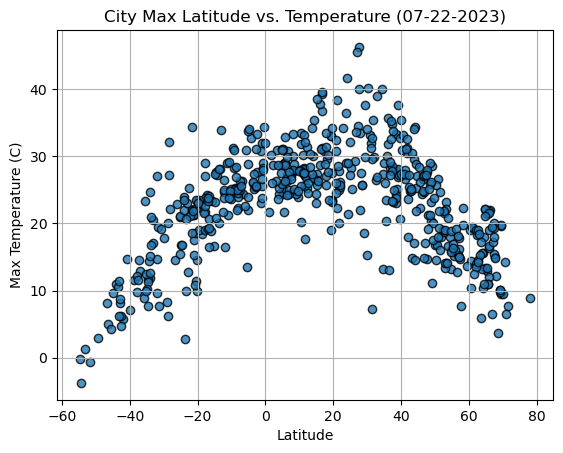

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Max Latitude vs. Temperature (07-22-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

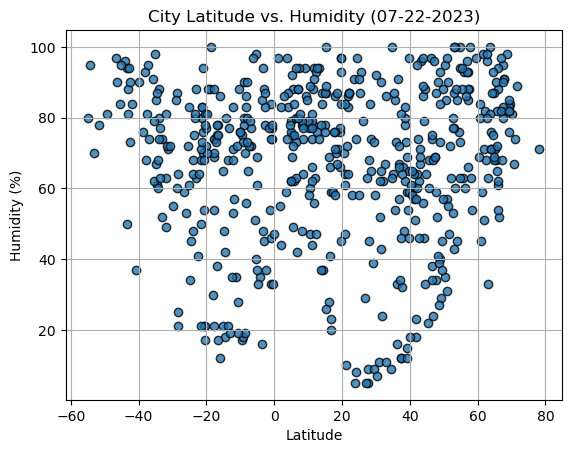

In [22]:
# Scatter plot for latitude vs. humidity incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07-22-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

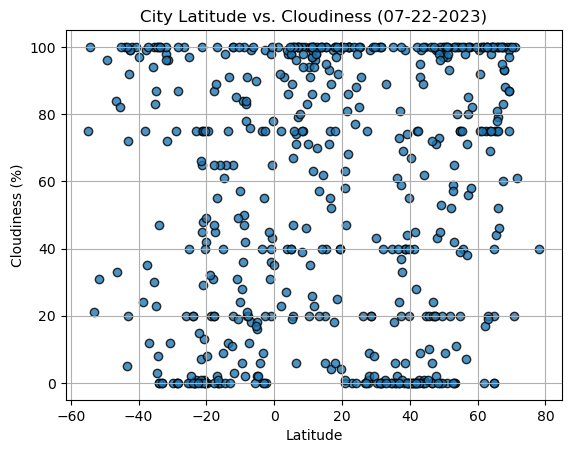

In [21]:
# Scatter plot for latitude vs. cloudiness incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07-22-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

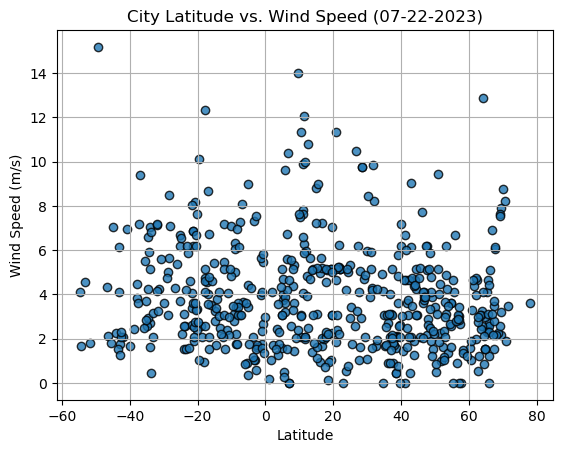

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07-22-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def Lin_regress(df,x_value,y_value,xlabel,ylabel,a,b):
    x = df[x_value]
    y = df[y_value]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,14.43,84,75,1.03,CA,1690041049
3,albany,42.6001,-73.9662,24.80,62,1,0.45,US,1690040538
4,talnakh,69.4865,88.3972,19.56,84,100,2.15,RU,1690041050
5,la oliva,28.6105,-13.9291,25.66,65,20,9.77,ES,1690041050
7,port blair,11.6667,92.7500,27.02,94,100,2.06,IN,1690041050


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,96,100,2.24,NZ,1690040537
2,carahue,-38.7000,-73.1667,11.55,76,24,2.45,CL,1690041049
6,edinburgh of the seven seas,-37.0676,-12.3116,12.91,74,12,9.40,SH,1690041050
8,carutapera,-1.1950,-46.0200,30.69,54,31,3.96,BR,1690041050
9,aitape,-3.1374,142.3475,25.45,88,55,1.04,PG,1690041050


###  Temperature vs. Latitude Linear Regression Plot

y = -0.24x + 32.81
The r-value is: 0.40956157743223104


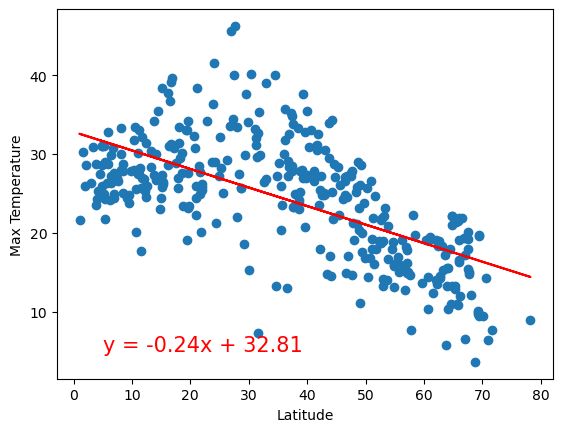

In [32]:
# Linear regression on Northern Hemisphere
Lin_regress(northern_hemi_df,'Lat','Max Temp','Latitude','Max Temperature',5,5)

y = 0.48x + 30.06
The r-value is: 0.6627908082538523


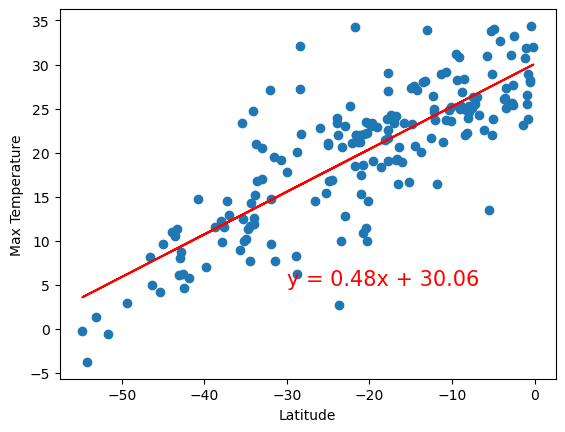

In [33]:
# Linear regression on Southern Hemisphere
Lin_regress(southern_hemi_df,'Lat','Max Temp','Latitude','Max Temperature',-30,5)

**Discussion about the linear relationship:** 
After analyzing the plots along with linear regression, it is apparent that as the latitude increases the max temperature decreases in the Northern Hemisphere. In the Southern Hemisphere the linear regression shows that as the latitude increases the max temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.07x + 65.56
The r-value is: 0.00421974049053767


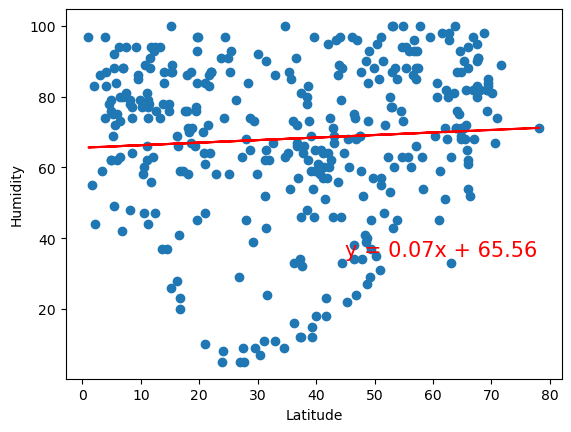

In [34]:
# Northern Hemisphere
Lin_regress(northern_hemi_df,'Lat','Humidity','Latitude','Humidity',45,35)

y = -0.45x + 56.65
The r-value is: 0.07547347023514804


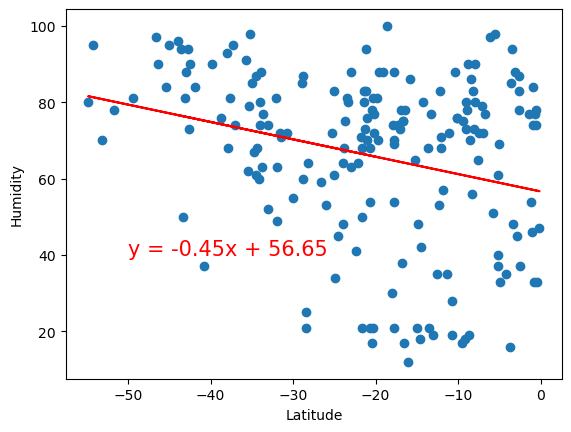

In [35]:
# Southern Hemisphere
Lin_regress(southern_hemi_df,'Lat','Humidity','Latitude','Humidity',-50,40)

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres there shows weak correlations comparing Humidity ands Latitude. More so in the Southern hemisphere a slight negative correlation is shown, yet still is not a strong correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.07x + 62.65
The r-value is: 0.0013280091954849503


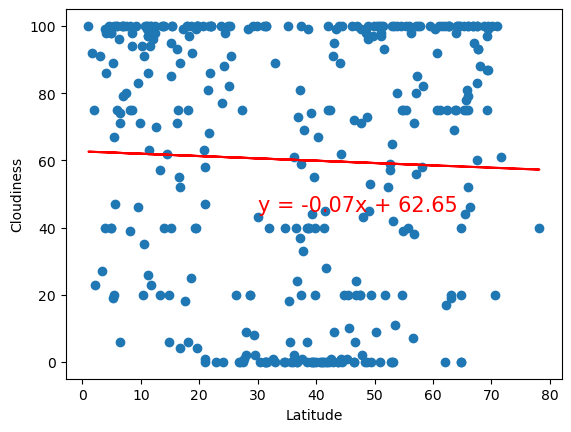

In [36]:
# Northern Hemisphere
Lin_regress(northern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness',30,45)

y = -0.07x + 62.65
The r-value is: 0.0013280091954849503


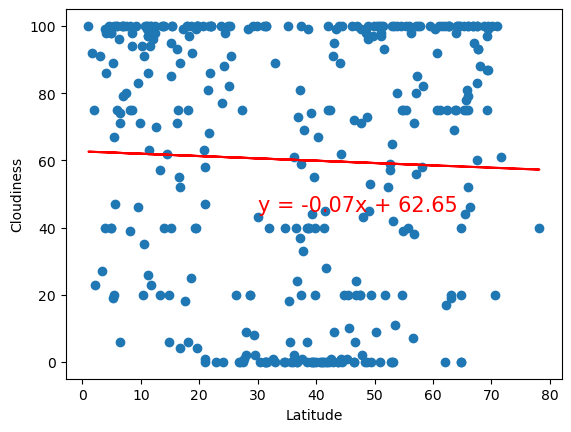

In [37]:
# Southern Hemisphere
Lin_regress(northern_hemi_df,'Lat','Cloudiness','Latitude','Cloudiness',30,45)

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres there is a weak correlation between Latitude and Cloudiness, as both r-values are leass than 0.05.

### Wind Speed vs. Latitude Linear Regression Plot

y = -0.02x + 4.31
The r-value is: 0.021069995748113864


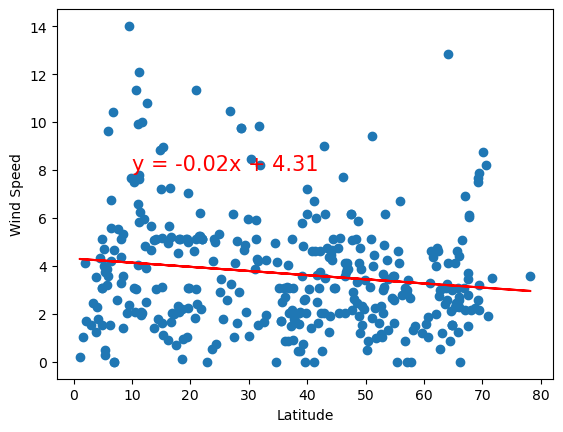

In [38]:
# Northern Hemisphere
Lin_regress(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed',10,8)

y = -0.02x + 3.67
The r-value is: 0.01118081989266045


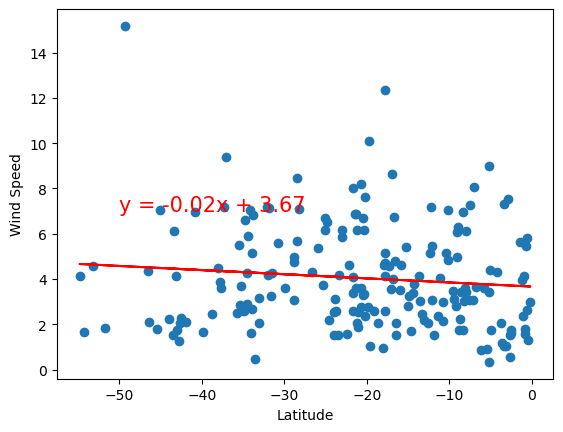

In [39]:
# Southern Hemisphere
Lin_regress(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed',-50,7)

**Discussion about the linear relationship:**
Bothe the Northern and Southern Hemispheres have ever-so slight negative correlations between Latitude and Wind Speed. Similar to the other correlation plots, both r-values are less than 0.05. 